In [1]:
import torch
from wfen_module.wfen_model import WFENModel
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wfening = WFENModel()
wfening.for_load_pretrain_model("models/wfen/WFEN.pth")

Loading pretrained model models/wfen/WFEN.pth


In [3]:
# img = Image.open("test.jpg").convert('RGB')
# img = Image.open("test_2.png").convert('RGB')
img = Image.open("test_3.png").convert('RGB')
img_np = np.array(img)
img_cv = img_np / 255 * 2 - 1
img_tensor = torch.from_numpy(img_cv.transpose(2, 0, 1)).unsqueeze(0).to('cuda') 
img_tensor = img_tensor.float()
out_tensor = wfening.netG.forward(img_tensor)

img_array = out_tensor.squeeze().data.cpu().numpy()
img_array = img_array.transpose(1, 2, 0)
new_img_arr = ((img_array + 1) / 2) * 255
cv_img = new_img_arr.clip(0, 255).astype(np.uint8)

j:\AI\ComfyUI_windows_portable\python_embeded\Lib\site-packages\transformers\utils\hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


In [6]:
img_tensor

tensor([[[[-0.8353, -0.8431, -0.8353,  ..., -0.7333, -0.7333, -0.7333],
          [-0.8353, -0.8431, -0.8353,  ..., -0.7333, -0.7333, -0.7333],
          [-0.8353, -0.8431, -0.8353,  ..., -0.7333, -0.7333, -0.7333],
          ...,
          [-0.6235, -0.6157, -0.6235,  ...,  0.4902,  0.4980,  0.4902],
          [-0.6157, -0.6157, -0.6157,  ...,  0.4824,  0.4902,  0.4902],
          [-0.6157, -0.6157, -0.6235,  ...,  0.4824,  0.4980,  0.4902]],

         [[-0.8275, -0.8275, -0.8196,  ..., -0.6941, -0.6941, -0.6941],
          [-0.8275, -0.8275, -0.8196,  ..., -0.6941, -0.6941, -0.6941],
          [-0.8275, -0.8275, -0.8196,  ..., -0.6941, -0.6941, -0.6941],
          ...,
          [-0.5373, -0.5294, -0.5373,  ...,  0.7569,  0.7725,  0.7647],
          [-0.5373, -0.5294, -0.5373,  ...,  0.7569,  0.7647,  0.7647],
          [-0.5373, -0.5294, -0.5373,  ...,  0.7569,  0.7647,  0.7647]],

         [[-0.9922, -0.9922, -0.9922,  ..., -0.8824, -0.8824, -0.8824],
          [-0.9922, -0.9922, -

In [7]:
img_tensor.shape

torch.Size([1, 3, 128, 128])

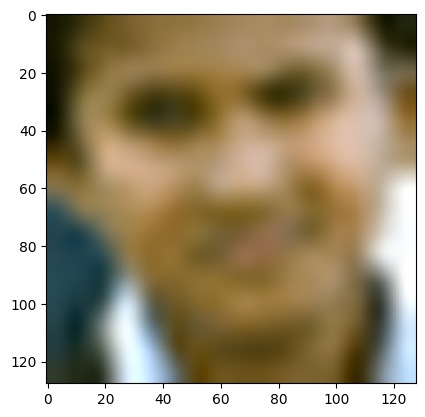

In [4]:
plt.imshow(img)

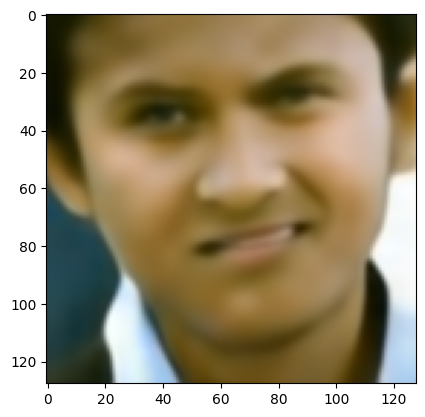

In [5]:
plt.imshow(cv_img)